## Import Relevant Modules

In [50]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [89]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb

## Read and parse challenge files

In [2]:
with open('ultimate_data_challenge.json', 'r') as file:
    data = json.load(file)
df_in = pd.DataFrame(data)
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [3]:
df_in.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [7]:
df_in.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [8]:
df_in['last_trip_date'] = pd.to_datetime(df_in['last_trip_date'], format='%Y-%m-%d')
df_in['signup_date'] = pd.to_datetime(df_in['signup_date'], format='%Y-%m-%d')
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [9]:
df_in.last_trip_date.describe()

count                            50000
mean     2014-04-19 08:02:04.992000256
min                2014-01-01 00:00:00
25%                2014-02-14 00:00:00
50%                2014-05-08 00:00:00
75%                2014-06-18 00:00:00
max                2014-07-01 00:00:00
Name: last_trip_date, dtype: object

(array([10147.,  4786.,  4174.,  4671.,  7418., 18804.]),
 array([16071.        , 16101.16666667, 16131.33333333, 16161.5       ,
        16191.66666667, 16221.83333333, 16252.        ]),
 <BarContainer object of 6 artists>)

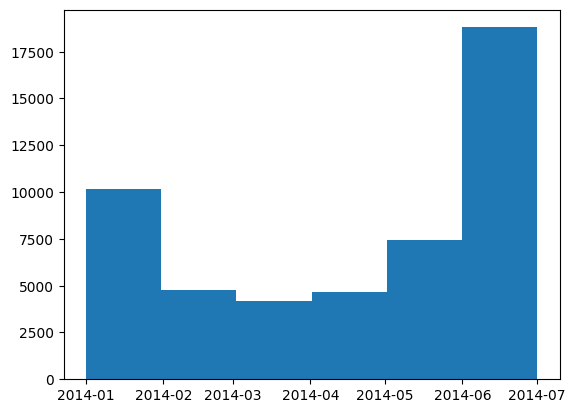

In [15]:
plt.hist(df_in.last_trip_date, bins=6)

In [43]:
df_in.signup_date.describe()

count                            49604
mean     2014-01-16 13:02:24.859285760
min                2014-01-01 00:00:00
25%                2014-01-09 00:00:00
50%                2014-01-17 00:00:00
75%                2014-01-24 00:00:00
max                2014-01-31 00:00:00
Name: signup_date, dtype: object

#### create target variable 'active' if user active in last 30 days of sample set

In [16]:
df_in['active'] = df_in['last_trip_date'] > pd.to_datetime('2014-06-01')
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  active                  50000 non-null  bool  

## Data Cleaning

In [19]:
df_in['avg_rating_of_driver'].fillna(df_in['avg_rating_of_driver'].median(), inplace=True)
df_in.dropna(subset=['phone'], inplace=True)
df_in['avg_rating_by_driver'].fillna(df_in['avg_rating_by_driver'].median(), inplace=True)
df_clean = df_in.copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49604 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
 12  active                  49604 non-null  bool       

# Plot correlations of each var to last reip date

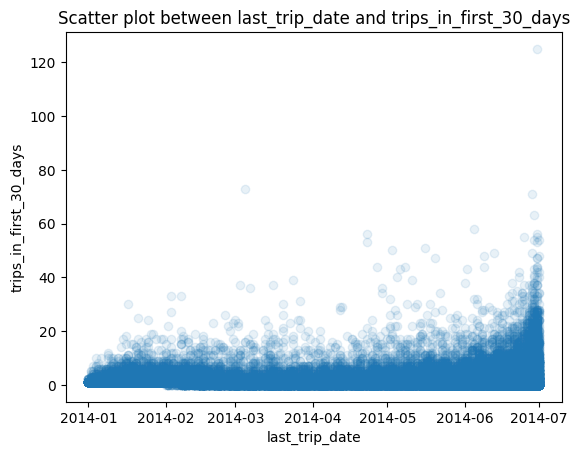

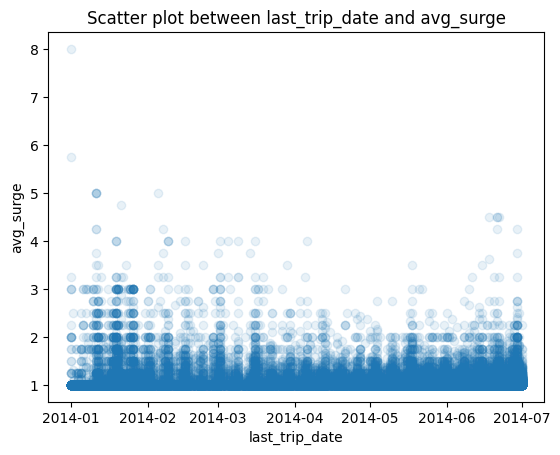

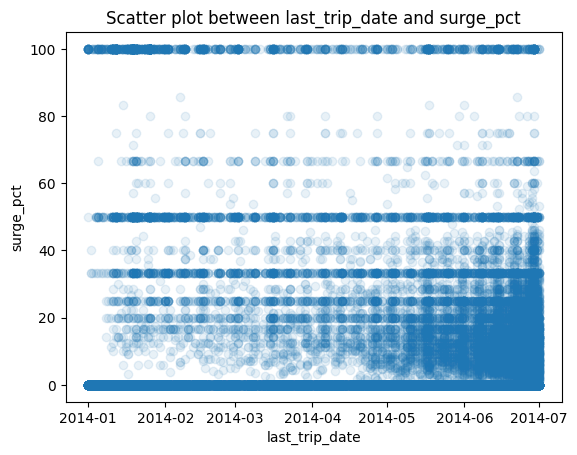

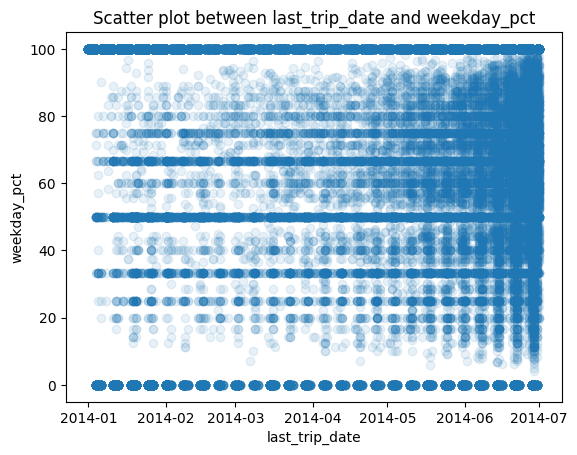

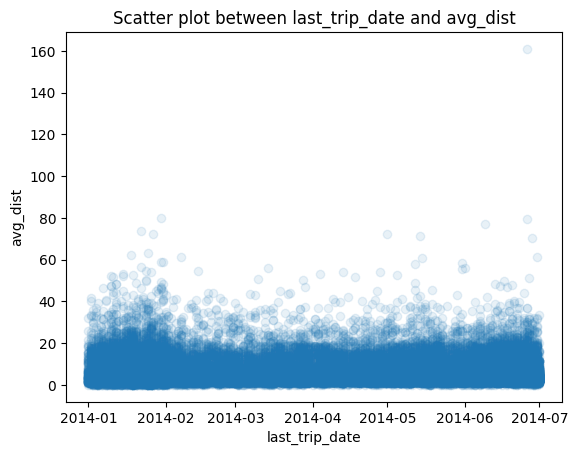

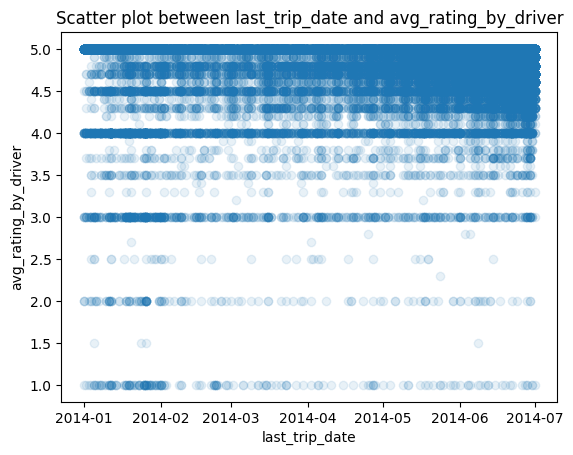

In [22]:
numeric_vars = ['trips_in_first_30_days', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']
for var in numeric_vars:
    plt.figure()
    plt.scatter(df_clean['last_trip_date'], df_clean[var], alpha=0.1)
    plt.xlabel('last_trip_date')
    plt.ylabel(var)
    plt.title(f'Scatter plot between last_trip_date and {var}')

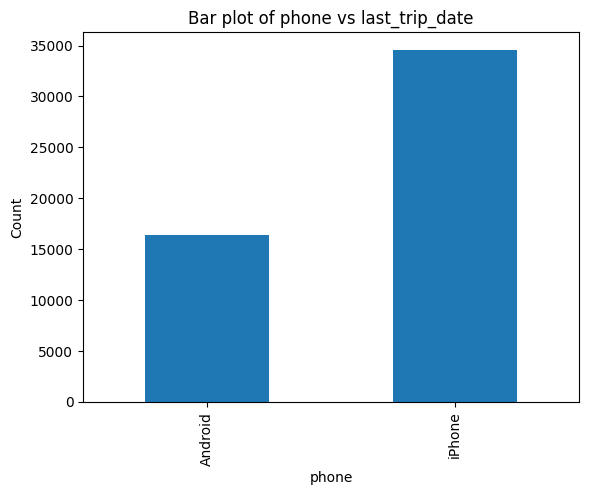

In [25]:
categorical_vars = ['city', 'phone']
for var in categorical_vars:
    df_in.groupby(var)['last_trip_date'].count().plot(kind='bar')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Bar plot of {var} vs last_trip_date')

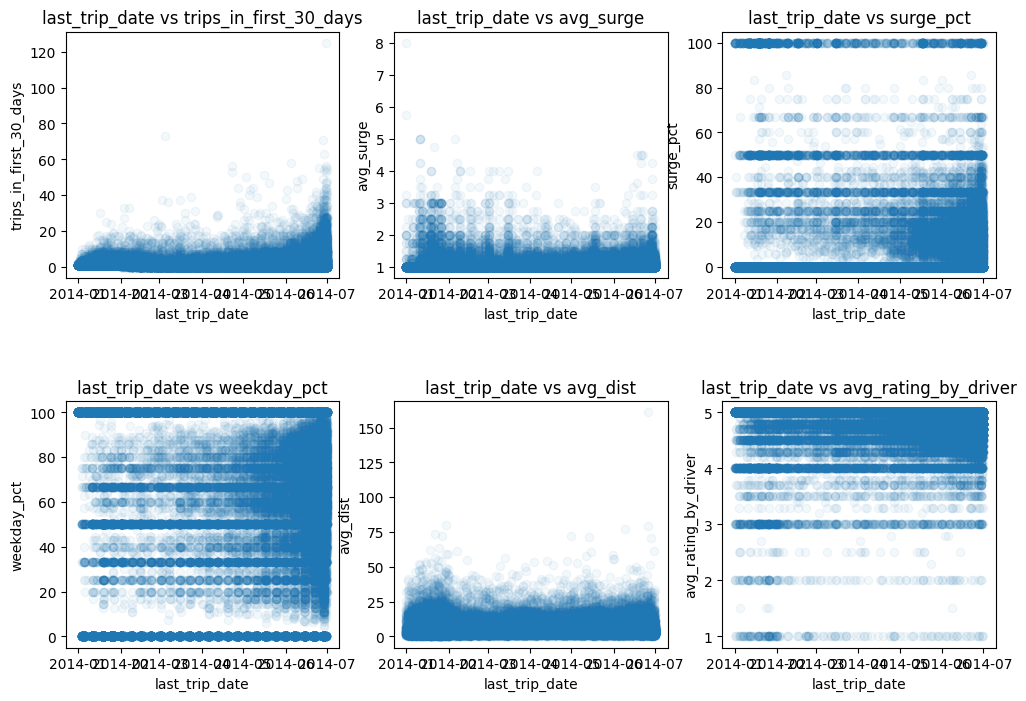

In [36]:
numeric_vars = ['trips_in_first_30_days', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']

# rows and columns for the subplot grid
num_rows = 2  
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)  

for i, var in enumerate(numeric_vars):
    row, col = divmod(i, num_cols)
    ax = axes[row, col]
    ax.scatter(df_in['last_trip_date'], df_in[var], alpha=0.05)
    ax.set_xlabel('last_trip_date')
    ax.set_ylabel(var)
    ax.set_title(f'last_trip_date vs {var}')

In [27]:
fraction_retained = df_clean['active'].value_counts(normalize=True)
fraction_retained

active
False    0.633497
True     0.366503
Name: proportion, dtype: float64

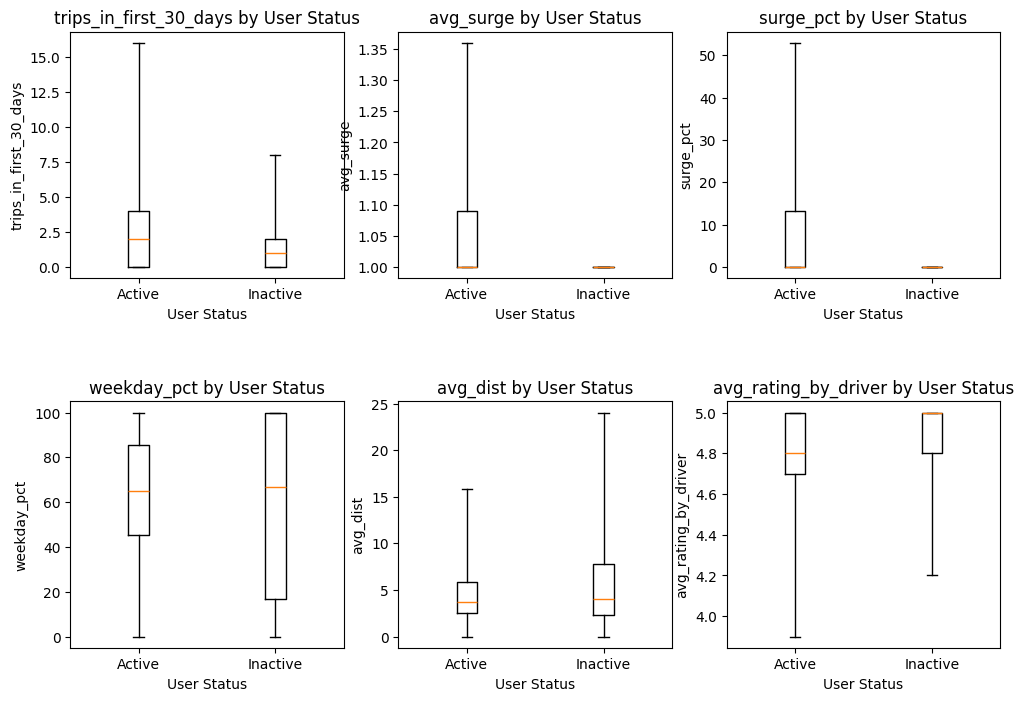

In [40]:
num_rows = 2
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)

for i, var in enumerate(numeric_vars):
    row, col = divmod(i, num_cols)
    ax = axes[row, col]
    
    # Create boxplots for 'active' positive and negative
    ax.boxplot([df_clean[df_clean['active'] == True][var], df_clean[df_clean['active'] == False][var]], 
               labels=['Active', 'Inactive'], whis=3, showfliers=False)
    ax.set_xlabel('User Status')
    ax.set_ylabel(var)
    ax.set_title(f'{var} by User Status')

In [61]:
df_clean_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49604 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trips_in_first_30_days  49604 non-null  float64       
 1   signup_date             49604 non-null  datetime64[ns]
 2   avg_rating_of_driver    49604 non-null  float64       
 3   avg_surge               49604 non-null  float64       
 4   last_trip_date          49604 non-null  datetime64[ns]
 5   surge_pct               49604 non-null  float64       
 6   ultimate_black_user     49604 non-null  bool          
 7   weekday_pct             49604 non-null  float64       
 8   avg_dist                49604 non-null  float64       
 9   avg_rating_by_driver    49604 non-null  float64       
 10  active                  49604 non-null  bool          
 11  phone_iPhone            49604 non-null  bool          
 12  city_King's Landing     49604 non-null  bool       

## Prep data for modeling

In [62]:
df_clean_encoded = pd.get_dummies(df_clean, columns=['phone', 'city'], drop_first=True)

#remove date columns
df_clean_encoded = df_clean_encoded.drop(columns=['last_trip_date', "signup_date"])

In [63]:
numeric_cols = ['trips_in_first_30_days', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']

# Initialize
scaler = StandardScaler()
df_clean_encoded[numeric_cols] = scaler.fit_transform(df_clean_encoded[numeric_cols])

/Users/johnbaselj/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/johnbaselj/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/johnbaselj/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/johnbaselj/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future ver

In [65]:
df_mod = df_clean_encoded.copy()
validation_size = 0.10
df_mod, validation_set = train_test_split(df_mod, test_size=0.10)

X = df_mod.drop(columns=['active'])  # Features
y = df_mod['active']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [66]:
print("X: ",X.shape)
print("y: ",y.shape)

X:  (44643, 11)
y:  (44643,)


## Train keras neural net model for performance comparison

In [57]:
#!pip3 install tensorflow

In [80]:

# Define the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [84]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2);

Epoch 1/10
447/447 [==============================] - 0s 572us/step - loss: 0.4520 - accuracy: 0.7873 - val_loss: 0.4659 - val_accuracy: 0.7859
Epoch 2/10
447/447 [==============================] - 0s 549us/step - loss: 0.4511 - accuracy: 0.7884 - val_loss: 0.4667 - val_accuracy: 0.7890
Epoch 3/10
447/447 [==============================] - 0s 514us/step - loss: 0.4507 - accuracy: 0.7895 - val_loss: 0.4705 - val_accuracy: 0.7864
Epoch 4/10
447/447 [==============================] - 0s 514us/step - loss: 0.4502 - accuracy: 0.7901 - val_loss: 0.4673 - val_accuracy: 0.7871
Epoch 5/10
447/447 [==============================] - 0s 509us/step - loss: 0.4504 - accuracy: 0.7887 - val_loss: 0.4666 - val_accuracy: 0.7873
Epoch 6/10
447/447 [==============================] - 0s 511us/step - loss: 0.4497 - accuracy: 0.7899 - val_loss: 0.4679 - val_accuracy: 0.7845
Epoch 7/10
447/447 [==============================] - 0s 510us/step - loss: 0.4496 - accuracy: 0.7918 - val_loss: 0.4673 - val_accuracy:

In [85]:
# Evaluate the model on the test set
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)


280/280 [==============================] - 0s 294us/step


In [88]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Test set accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Test set accuracy: 78.24%
Precision: 0.75
Recall: 0.60
F1-score: 0.67
ROC AUC: 0.74


## Train XGBoost

repeat train/test split to clean up formatting changes made for neural net

In [91]:
df_mod = df_clean_encoded.copy()
validation_size = 0.10
df_mod, validation_set = train_test_split(df_mod, test_size=0.10)

X = df_mod.drop(columns=['active'])  # Features
y = df_mod['active']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [92]:
# Create an XGBoost DMatrix for training
dtrain = xgb.DMatrix(X, label=y)

# Set hyperparameters for XGBoost (you can adjust these as needed)
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
    'eval_metric': 'logloss'
}

# Train the XGBoost model
num_round = 100  # Number of boosting rounds (you can adjust this)
model = xgb.train(params, dtrain, num_round)

# Make predictions on the test set
dtest = xgb.DMatrix(X_test)
y_pred_proba = model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)

/Users/johnbaselj/miniconda3/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/johnbaselj/miniconda3/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/johnbaselj/miniconda3/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/johnbaselj/miniconda3/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

In [93]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Test set accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Test set accuracy: 79.52%
Precision: 0.75
Recall: 0.67
F1-score: 0.71
ROC AUC: 0.77


Text(0.5, 1.0, 'Feature Importance (Weight)')

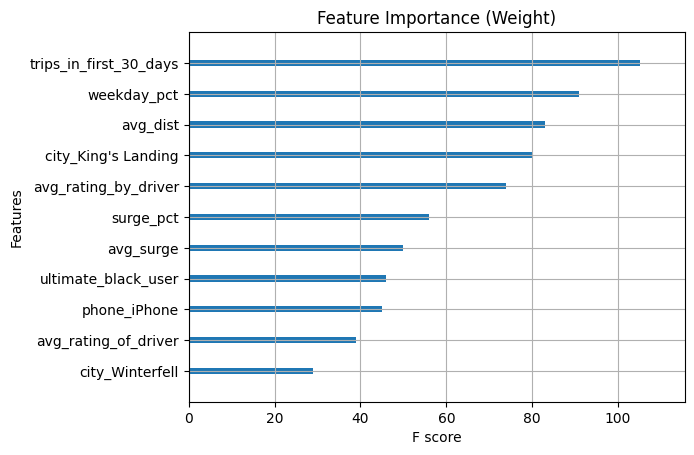

In [94]:
xgb.plot_importance(model, importance_type='weight', show_values=False)
plt.title('Feature Importance (Weight)')